# This notebook goes over the merging of meta-data and features

We associate the extracted CNN features (explanitory vars) with the growth indicators (response var)

In [29]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
import glob

# Files and directories

In [37]:
meta_data_file = '/data/meron/kenya_data/meron_meta_processed.csv'
#features_dir = '/data/meron/features_resnet_augmented/sam_upsampled'
hist_fig = '/data/meron/figs/wfh_dist_smart.jpg'
mclass_fig = '/data/meron/figs/malcls_dist_smart.jpg'
encoder_file='/data/meron/smart_features_encoder/smart_encoder_features.csv'


In [38]:
feature_files= glob.glob('/data/meron/features_resnet_augmented/sam_mam_upsampled/*.csv')
feature_files

['/data/meron/features_resnet_augmented/sam_mam_upsampled/features_4.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_3.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_2.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_1.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_0.csv']

In [39]:
meta_data = pd.read_csv(meta_data_file)

features = pd.DataFrame()
for f in feature_files:
    df = pd.read_csv(f)
    features = pd.concat([features, df], axis=0)
    print(f + ' loaded')

/data/meron/features_resnet_augmented/sam_mam_upsampled/features_4.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_3.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_2.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_1.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_0.csv loaded


In [33]:
features.head()

,photo_id,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1517384891739_flip.jpg,0.157335,0.015997,0.707683,0.009274,0.000000,0.698504,1.974866,6.329210,0.000000,...,0.235419,0.585367,0.553431,0.0,0.260236,2.768777,0.664274,0.030266,1.867831,0.024899
1,1517396465707.jpg,0.000000,2.344903,0.200998,0.323836,2.933506,2.859201,2.615635,9.010788,0.338610,...,0.000000,2.795960,1.454802,0.0,0.000000,2.222442,0.000000,0.000000,0.290227,0.000000
2,1517478268776.jpg,0.045922,0.000000,3.087823,0.000000,0.331306,1.069497,1.636940,1.760356,0.000000,...,0.243376,0.129418,0.409441,0.0,0.000000,3.223908,0.000000,0.000000,4.154829,0.812403
3,1517303513931.jpg,0.000000,2.610384,1.328003,1.401934,0.887466,0.000000,2.456745,13.258943,3.503489,...,0.000000,0.508812,2.134569,0.0,0.000000,5.748155,0.155644,4.078206,2.158419,0.006808
4,1517238175403.jpg,0.000000,0.369026,2.461378,2.946527,0.661946,4.072535,0.526728,6.682256,0.000000,...,1.308302,0.031628,0.687893,0.0,0.000000,1.743518,0.575827,0.000000,2.062518,0.352439


In [34]:
meta_data.head()

,age_months,ena_plausibility_check,gender,height_cm,muac_cm,name_meron,name_smart,photo_id,weight_kg,wfh,hfa,wfa,maln_class,gender_male,maln_mam,maln_normal,maln_sam
0,7.0,1.0,Male,71.4,14.5,Benson kagua,benson kagua,1518166907643.jpg,9.3,0.72,1.03,1.05,normal,1,0,1,0
1,16.0,1.0,Female,80.0,15.3,Daisy linn,daisy line,1518169210738.jpg,10.3,0.23,0.50,0.39,normal,0,0,1,0
2,12.0,1.0,Female,74.5,15.8,Trace,tracy mwendwa,1518169594179.jpg,9.8,0.86,0.19,0.73,normal,0,0,1,0
3,35.0,1.0,Female,89.4,15.8,Mariam,marian rajab,1518175903405.jpg,12.8,0.25,-1.32,-0.51,normal,0,0,1,0
4,35.0,1.0,Male,94.1,14.5,Leilan learpanae,leiyan larpanai,1518247639265.jpg,12.3,-1.48,-0.36,-1.18,normal,1,0,1,0


In [70]:
#optional, change class to binary
maln_dict={'sam':'am','mam':'am'}
meta_data['maln_class'].map(maln_dict)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
4392    NaN
4393     am
4394    NaN
4395    NaN
4396    NaN
4397    NaN
4398    NaN
4399    NaN
4400    NaN
4401    NaN
4402    NaN
4403    NaN
4404    NaN
4405    NaN
4406    NaN
4407    NaN
4408    NaN
4409    NaN
4410    NaN
4411    NaN
4412    NaN
4413    NaN
4414    NaN
4415     am
4416    NaN
4417    NaN
4418    NaN
4419     am
4420    NaN
4421    NaN
Name: maln_class, Length: 4422, dtype: object

In [67]:
g

In [21]:
#### for augmented and flipped images
original_id=[]
for row in features['photo_id']:
    base_name=row.split('.')[0].split('_')[0]
    modified_name=base_name+'.jpg'
    original_id.append(modified_name)

In [6]:
encoder_data=pd.read_csv(encoder_file)

In [22]:
features['photo_id']=original_id

In [23]:
features.head()

,photo_id,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1517384891739.jpg,0.157335,0.015997,0.707683,0.009274,0.000000,0.698504,1.974866,6.329210,0.000000,...,0.235419,0.585367,0.553431,0.0,0.260236,2.768777,0.664274,0.030266,1.867831,0.024899
1,1517396465707.jpg,0.000000,2.344903,0.200998,0.323836,2.933506,2.859201,2.615635,9.010788,0.338610,...,0.000000,2.795960,1.454802,0.0,0.000000,2.222442,0.000000,0.000000,0.290227,0.000000
2,1517478268776.jpg,0.045922,0.000000,3.087823,0.000000,0.331306,1.069497,1.636940,1.760356,0.000000,...,0.243376,0.129418,0.409441,0.0,0.000000,3.223908,0.000000,0.000000,4.154829,0.812403
3,1517303513931.jpg,0.000000,2.610384,1.328003,1.401934,0.887466,0.000000,2.456745,13.258943,3.503489,...,0.000000,0.508812,2.134569,0.0,0.000000,5.748155,0.155644,4.078206,2.158419,0.006808
4,1517238175403.jpg,0.000000,0.369026,2.461378,2.946527,0.661946,4.072535,0.526728,6.682256,0.000000,...,1.308302,0.031628,0.687893,0.0,0.000000,1.743518,0.575827,0.000000,2.062518,0.352439


In [24]:
print('size of meta data for smart dataset: {}'.format(meta_data.shape))
print('size of resnet features for smart dataset: {}'.format(features.shape))
print('size of encoder features for smart dataset: {}'.format(encoder_data.shape))

size of meta data for smart dataset: (4422, 17)
size of resnet features for smart dataset: (4430, 2049)
size of encoder features for smart dataset: (3843, 129)


size of the merged dataset: (4203, 2056)


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


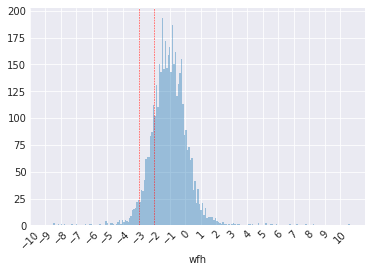

In [27]:
## We only want the photo id, Gender, age, and mam hot-encoder columns, drop duplicate (duplicate samples info were the same)
select_cols=['photo_id','gender_male', 'age_months','maln_mam','maln_normal','maln_sam', 'wfh', 'maln_class']
merged_df=pd.merge(features, meta_data[select_cols], on="photo_id")
print('size of the merged dataset: {}'.format(merged_df.shape))
# merged_df.head()
splot = sns.distplot(meta_data['wfh'], bins=200, kde=False)  # kde_kws={'linewidth':1.0})
plt.xticks(np.arange(-10,11), rotation=45)
splot.axvline(x=-2.0, color='r', linestyle='--', linewidth=0.5)
splot.axvline(x=-3.0, color='r', linestyle='--', linewidth=0.5)
plt.savefig(hist_fig, dpi=400)

In [12]:
merged_df['maln_class'].value_counts()

normal    3018
mam        944
sam        234
Name: maln_class, dtype: int64

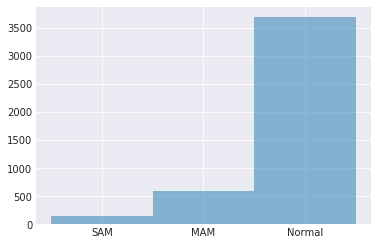

In [13]:
# mln_plot = sns.distplot(meta_data['maln_class'], bins=3, kde=False)  # kde_kws={'linewidth':1.0})
meta_data['maln_class_code'] = 0
meta_data.loc[meta_data['maln_class'] == 'normal', 'maln_class_code'] = 2
meta_data.loc[meta_data['maln_class'] == 'mam', 'maln_class_code'] = 1
plt.hist(meta_data['maln_class_code'], bins=[0, 1, 2, 3], align='left', alpha=0.5)
plt.xticks([0, 1, 2], ['SAM', 'MAM', 'Normal'])
plt.savefig(mclass_fig, dpi=400)

In [14]:
merged_df.shape

(4196, 2056)

In [28]:
merged_df.to_csv('/data/meron/kenya_data/meron_merged_mal(sam_mam_upsampled).csv', index=False)

missing_data=smart_encoder_feats[(~smart_encoder_feats['photo_id'].isin(merged_df['photo_id']))].drop_duplicates('photo_id', keep='first')

missing_data['photo_id'].to_csv('/data/meron/kenya_data/missing_photo_id.csv', index=False)

# merge data for WFH

In [13]:
select_cols2=['photo_id','gender_male', 'age_months', 'wfh']
merged_df_wfh=pd.merge(features, meta_data[select_cols2], on="photo_id").drop_duplicates('photo_id', keep='first')
print('size of the merged dataset: {}'.format(merged_df_wfh.shape))

size of the merged dataset: (3594, 2052)


In [14]:
merged_df_wfh.to_csv('/data/meron/kenya_data/meron_merge_wfh.csv', index=False)